In [1]:
from PIL import Image
import glob

import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

### Create Dataset from files

In [2]:
files =  glob.glob("tiles/**/*/*.png")
category = {'180':0, '135':4, '90':12, '45':20}
x, y = [], [] 
for file in files:
    tile_name = file.split("\\")[-1].split('-')
    tile_type = category[tile_name[0]]+int(tile_name[1])
    y.append(tile_type)
    im = Image.open(file)
    pixel_values = np.array([abs(255-val[0]) for val in list(im.getdata())])
    x.append(pixel_values.reshape((60,60)))

x = np.array(x)
y = np_utils.to_categorical(y,28)


In [3]:
x[0], x[0].shape

(array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255]]),
 (60, 60))

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15)

In [5]:
x_train.shape, y_train.shape, x_test.shape

((595, 60, 60), (595, 28), (105, 60, 60))

In [6]:
import keras.backend as K
import keras.models as km
import keras.layers as kl
K.image_data_format()

'channels_last'

In [7]:
x_train = x_train.reshape(x_train.shape[0], 60,60,1)
x_test = x_test.reshape(x_test.shape[0], 60,60,1)
x_train.shape

(595, 60, 60, 1)

In [ ]:
# model = km.Sequential()
# model.add(kl.Conv2D(numfm, kernel_size = (10, 10), input_shape = input_shape, activation = "relu"))
# model.add(kl.MaxPooling2D(pool_size = (4, 4), strides = (4, 4)))
# model.add(kl.Dropout(0.2,name = 'dropout'))
# model.add(kl.Conv2D(2 * numfm, kernel_size = (6, 6), activation = "relu"))
# model.add(kl.MaxPooling2D(pool_size = (4, 4), strides = (4, 4)))
# model.add(kl.Flatten())
# model.add(kl.Dense(numnodes, activation = "tanh"))
# model.add(kl.Dense(28, activation = "softmax"))

In [8]:
def create_model(numfm, numnodes):
    # numfm, numnodes = 5, 250
    input_shape = (60,60,1)

    model = km.Sequential()
    model.add(kl.Conv2D(numfm, kernel_size = (5, 5), input_shape = input_shape, activation = "relu"))
    model.add(kl.MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(kl.Dropout(0.2,name = 'dropout'))
    model.add(kl.Flatten())
    model.add(kl.Dense(numnodes, activation = "tanh"))
    model.add(kl.Dense(28, activation = "softmax"))

    return model

Testing filter and hidden node values

In [ ]:
# train_history, val_history = {},{}
# numnfs = [2,3,5,7,10,15,20]
# num_nodes = [8,16,32,64,100,150,200,250,300,400,500]
# for nfs in numnfs:
#     train_history[nfs], val_history[nfs] = [], [] 
#     for nodes in num_nodes:
#         print(f'Current Model - {nfs} NFS, {nodes} Nodes')
#         model = create_model(nfs, nodes)
#         model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#         history = model.fit(x_train, y_train, epochs=50, batch_size=20, verbose=0)
#         train_history[nfs].append(history.history['accuracy'][-1])
#         val_history[nfs].append(model.evaluate(x_test, y_test)[-1])
#         K.clear_session()
   

In [36]:
# import matplotlib.pyplot as plt

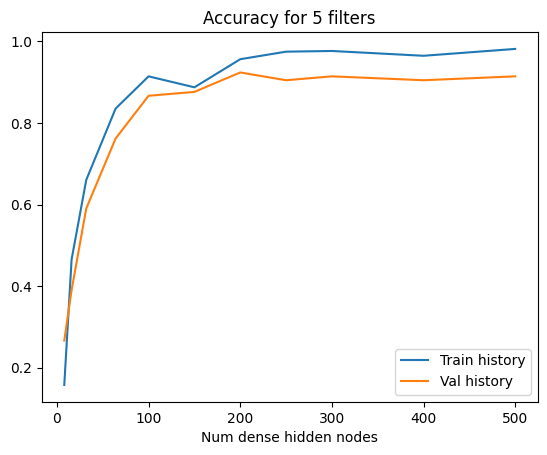

In [37]:
# nfs = 5
# plt.title(f'Accuracy for {nfs} filters')
# plt.xlabel('Num dense hidden nodes')
# plt.plot(num_nodes, train_history[nfs], label = f"Train history")
# plt.plot(num_nodes, val_history[nfs], label = f"Val history")
# plt.legend()
# plt.show()

In [ ]:
# for nfs in numnfs:      #Saving the graphs so I can look at
#     plt.title(f'Accuracy for {nfs} filters')
#     plt.xlabel('Num dense hidden nodes')
#     plt.plot(num_nodes, train_history[nfs], label = f"Train history")
#     plt.plot(num_nodes, val_history[nfs], label = f"Val history")
#     plt.legend()
#     plt.savefig(f'pyplots/{nfs}_filters.png')
#     plt.clf()
 
# plt.show()

Evaluating model

In [16]:
model = create_model(5,512)     #3,300 also looked good
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=20, verbose=2)

Epoch 1/50
30/30 - 1s - loss: 2.7845 - accuracy: 0.2588 - 663ms/epoch - 22ms/step
Epoch 2/50
30/30 - 0s - loss: 1.6772 - accuracy: 0.5613 - 349ms/epoch - 12ms/step
Epoch 3/50
30/30 - 0s - loss: 1.2855 - accuracy: 0.7059 - 391ms/epoch - 13ms/step
Epoch 4/50
30/30 - 0s - loss: 1.0016 - accuracy: 0.7798 - 336ms/epoch - 11ms/step
Epoch 5/50
30/30 - 0s - loss: 0.8280 - accuracy: 0.8487 - 362ms/epoch - 12ms/step
Epoch 6/50
30/30 - 0s - loss: 0.7226 - accuracy: 0.8454 - 396ms/epoch - 13ms/step
Epoch 7/50
30/30 - 0s - loss: 0.6743 - accuracy: 0.8672 - 348ms/epoch - 12ms/step
Epoch 8/50
30/30 - 0s - loss: 0.5862 - accuracy: 0.8891 - 364ms/epoch - 12ms/step
Epoch 9/50
30/30 - 0s - loss: 0.5023 - accuracy: 0.9025 - 332ms/epoch - 11ms/step
Epoch 10/50
30/30 - 0s - loss: 0.4465 - accuracy: 0.9143 - 333ms/epoch - 11ms/step
Epoch 11/50
30/30 - 0s - loss: 0.4262 - accuracy: 0.9160 - 344ms/epoch - 11ms/step
Epoch 12/50
30/30 - 0s - loss: 0.3897 - accuracy: 0.9244 - 332ms/epoch - 11ms/step
Epoch 13/50
3

In [17]:
history.history['accuracy'][-1]

0.9882352948188782

In [18]:
model.evaluate(x_test, y_test)[-1]

4/4 [==============================] - 0s 4ms/step - loss: 0.2421 - accuracy: 0.9333


0.9333333373069763

In [19]:
x[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]])

In [20]:
x_test[0].shape

(60, 60, 1)

In [21]:
y_pred = model.predict(x_test)
y_pred = np.array([np.argmax(y) for y in y_pred])
y_true = np.array([np.argmax(y) for y in y_test])
y_pred, y_true

(array([ 3, 26, 17, 15,  9, 20,  5,  6, 22, 24,  7, 26, 18, 18, 15,  7, 16,
        18, 15,  2,  5, 27, 12, 19, 13,  6, 26,  7, 18,  3,  1, 24, 27, 12,
        26,  1,  3, 22,  1,  1, 27,  4, 27, 26,  0, 26,  5, 11,  7,  9, 17,
        10,  0, 27, 21, 17,  6,  6,  2, 26,  8, 22,  4, 16, 16,  4, 11,  3,
        10, 16, 13, 18,  0, 11, 16,  4, 11,  9, 25, 26,  2, 24,  9, 14, 22,
        20,  0,  5, 15,  8, 15,  0,  9,  5, 10, 12,  1, 21,  7, 27,  8,  3,
         7, 20, 12], dtype=int64),
 array([ 3, 26, 17, 15,  9, 20,  5,  6, 22, 24,  7, 26, 18, 18, 15,  7, 16,
        18, 15,  2,  5, 27, 12, 19, 13,  6, 26,  7, 18,  3,  1, 24, 27, 12,
        26,  1,  3, 22, 14, 14, 27,  4, 27, 26,  0, 26, 14, 11,  7,  9, 17,
        10,  0, 27, 21, 17,  6,  6,  2, 26,  8, 22,  4, 16, 16,  4, 11,  3,
        10, 16, 13, 18,  0, 11, 16,  4, 11, 18, 25, 26,  2, 24,  9, 14,  0,
        20,  0,  5, 15,  8, 15,  0,  9,  5, 10, 12,  1, 21, 16, 27,  8,  7,
         7, 20, 12], dtype=int64))

In [34]:
np.argmax(model.predict(x_test[4:5])), np.argmax(y_test[4])
### idrk why it's doing this


(9, 9)